https://www.teihenai.com/2018/08/13/python-hukusu/

In [5]:
import pandas as pd
import math
import numpy as np
from sklearn import tree
import scipy.stats
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\msgothic.ttc', size=16)

In [6]:
team_name_all=["愛媛","横浜","岡山","岐阜","京都","金沢","熊本","甲府","山形","山口","讃岐","鹿児島","松本","湘南","新潟","水戸","千葉","群馬","大宮","大分","町田","長崎","東京","徳島","栃木","柏","福岡","名古屋","琉球"]
team_number_all=["37","34","42","39","24","275","38","28","29","330","48","338","46","12","78","94","2","35","27","31","45","47","4","36","40","11","23","8","277"]

愛媛


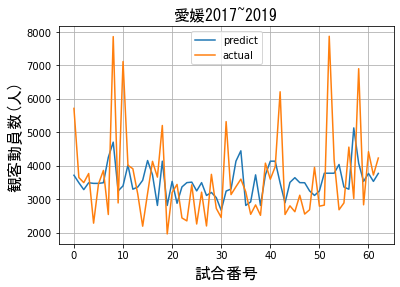

横浜


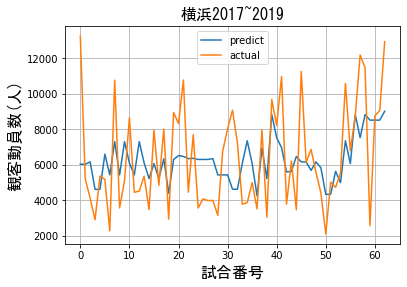

岡山


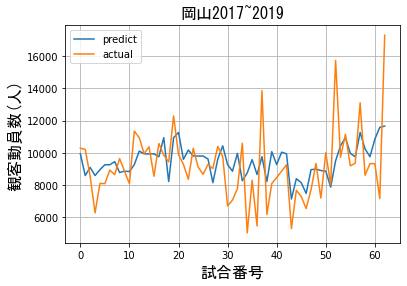

岐阜


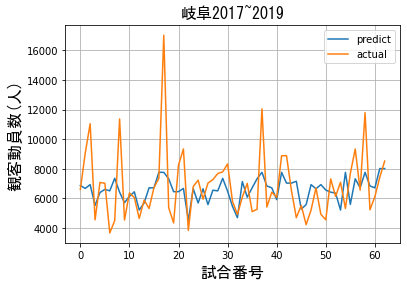

京都


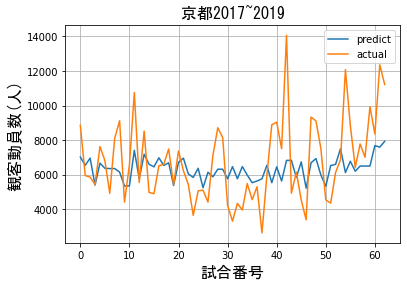

金沢


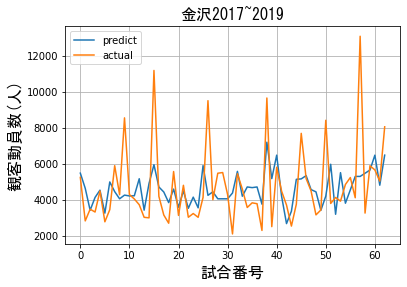

熊本


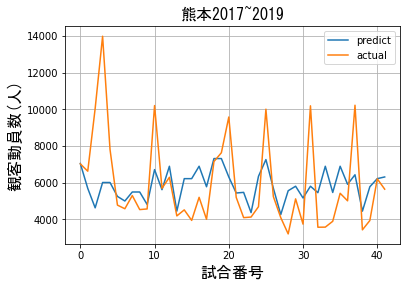

甲府


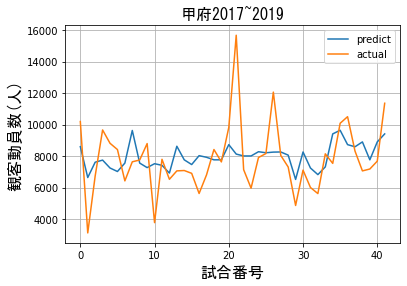

山形


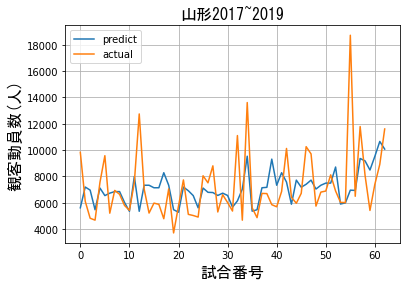

山口


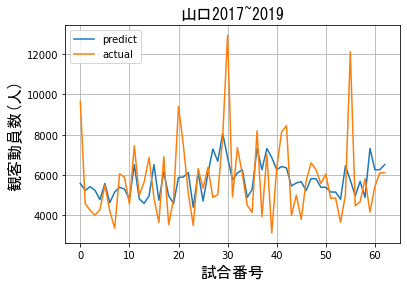

讃岐


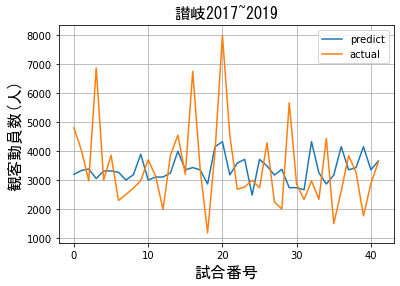

鹿児島


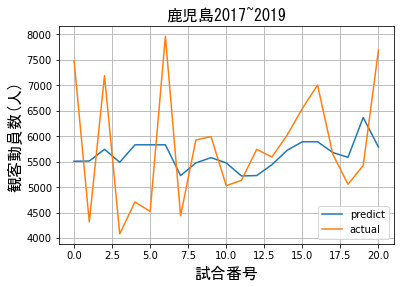

松本


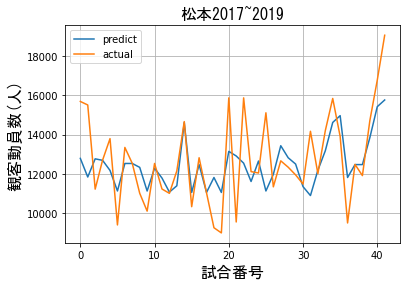

湘南


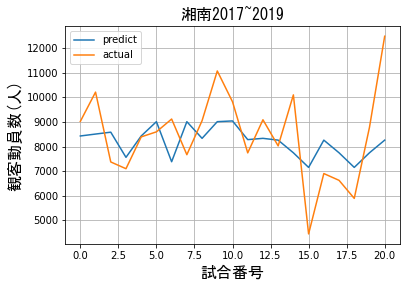

新潟


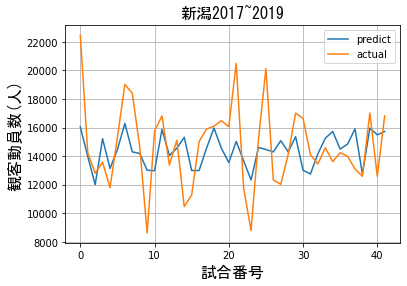

水戸


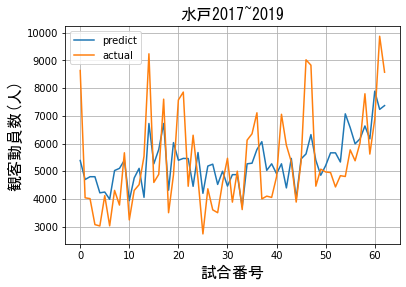

千葉


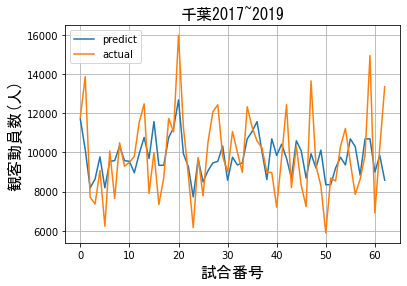

群馬


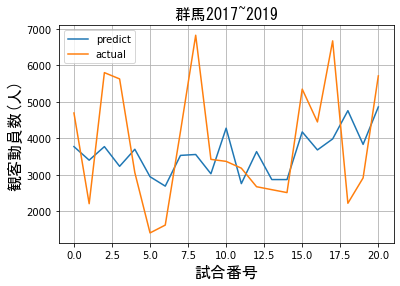

大宮


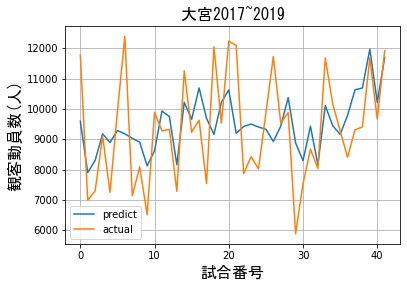

大分


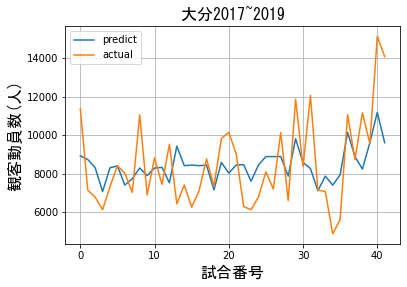

町田


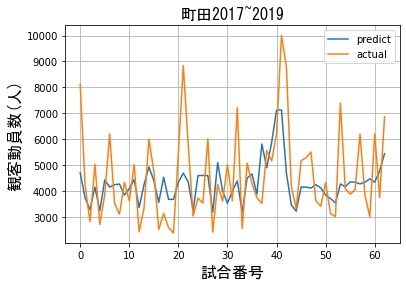

長崎


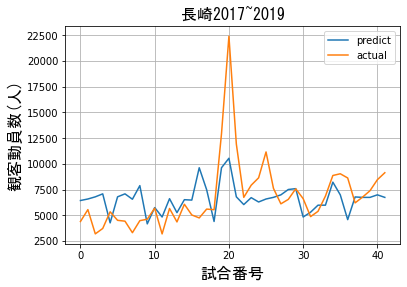

東京


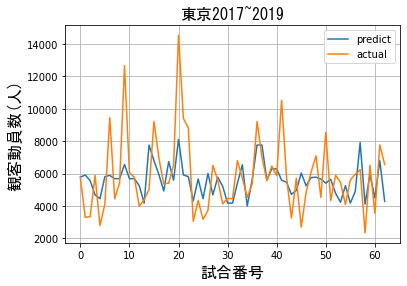

徳島


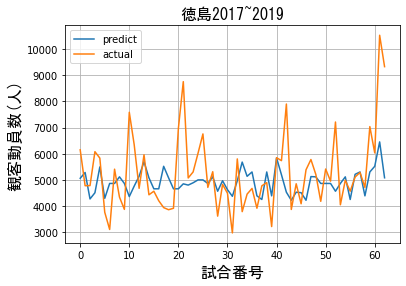

栃木


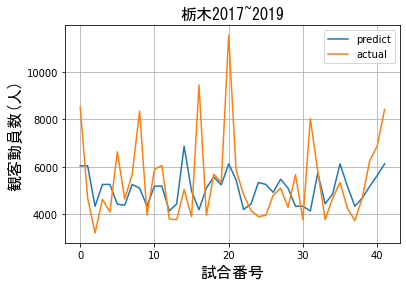

柏


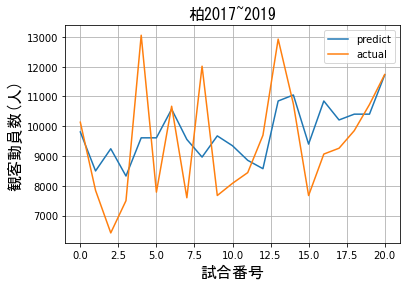

福岡


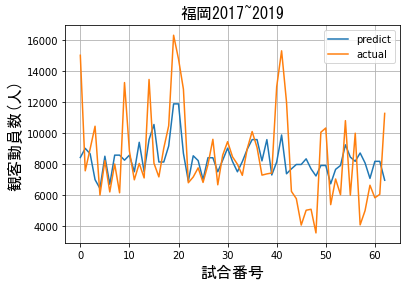

名古屋


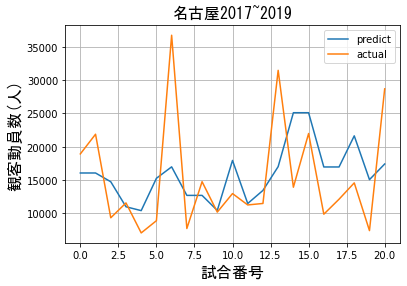

琉球


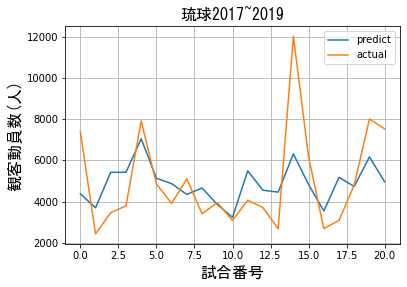

In [8]:
import os

for a in range(29):
    team_name=team_name_all[a]
    print(team_name)
    team_number=team_number_all[a]
    url=f"https://data.j-league.or.jp/SFMS01/search?competition_years=2019&competition_years=2018&competition_years=2017&competition_frame_ids=2&team_ids={team_number}&home_away_select=1&tv_relay_station_name="
    fomerdata=pd.read_html(url,header=0)
    data=fomerdata[0].drop(["大会","スタジアム"],axis=1)    
    game_day=data.試合日
    game_day=[s.replace("月・祝","月").replace("火・祝","火").replace("水・祝","水").replace("木・祝","木").replace("金・祝","金").replace("土・祝","土").replace("日・祝","日").replace("月・休","月") for s in game_day]
    day=data.年度.astype(str)+"/"+game_day
    day=pd.DataFrame({"年/月/日":day})
    data=pd.concat([data,day],axis=1)
    tenki=pd.read_excel(f"c:\\Users\\梅津魁秀\\Desktop\\卒業研究\\天気データ\\全国天気\\{team_name}.xlsx",skiprows=3)
    tenki=tenki.fillna(0)
    tenki=tenki.drop(tenki.index[[0]]).reset_index(drop=True)
    tenki=tenki.drop(tenki.index[1095])
    #1時間当たりの降水量情報を入れる
    tenki2=pd.read_excel(f"c:\\Users\\梅津魁秀\\Desktop\\卒業研究\\1時間降水量の日最大\\{team_name}1.xlsx",skiprows=3)
    tenki2=tenki2.drop(tenki2.index[[0,1,1097]]).reset_index(drop=True)
    tenki["1時間降水量の最大(mm)"]=tenki2["1時間降水量の最大(mm)"]
    google_trend=pd.read_csv("gt.csv").drop(["Unnamed: 0"],axis=1)
    google_trend=google_trend[f"{team_name}"]
    tenki=pd.concat([tenki,google_trend],axis=1)
    tenki=tenki.rename(columns={f"{team_name}":"ホームトレンド"})
    day2=tenki.年.round().astype(int).astype(str)+"/"+tenki.月.round().astype(int).astype(str).str.zfill(2)+"/"+tenki.日.round().astype(int).astype(str).str.zfill(2)+"("+tenki.曜日+")"
    day2=pd.DataFrame({"年/月/日":day2})
    tenki=pd.concat([tenki,day2],axis=1)
    data=pd.merge(data,tenki[["年/月/日","平均気温(℃)","降水量の合計(mm)","日照時間(時間)","ホームトレンド","1時間降水量の最大(mm)"]],on="年/月/日",how="left")
    sec=data.節.str.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))
    sec=sec.str.extract("(.+)節",expand=True).rename(columns={0:"節数"})
    data=pd.concat([data,sec],axis=1)
    rank=pd.read_csv("c:\\Users\\梅津魁秀\\anaconda3\\rank.csv").drop(["Unnamed: 0"],axis=1)
    rank2=rank.rename(columns={"アウェイ":"ホーム"})
    data=pd.merge(data,rank[["アウェイ","節数","年度","順位"]],on=["アウェイ","年度","節数"],how="left")
    data=pd.merge(data,rank2[["ホーム","節数","年度","順位"]],on=["ホーム","年度","節数"],how="left")
    data=data.rename(columns={"順位_x":"アウェイ順位","順位_y":"ホーム順位"})
    data["節数"]=data["節数"].str.replace('第', '')
    data["K/O時刻"]=data["K/O時刻"].str[:2]
    score=data.スコア.str.split('-', expand=True)
    score=score[[0,1]].astype(np.int64)
    data["点数(ホームーアウェイ)"]=score[0]-score[1]
    data=data.drop(["年度","節","試合日","ホーム","インターネット中継・TV放送","年/月/日","アウェイ","スコア"],axis=1)
    temperature＿mean=int(data["平均気温(℃)"].mean())
    #それぞれ平均を引いた値を出力する。
    data["平均気温(℃)"]=round(data["平均気温(℃)"]-temperature＿mean,1)
    data=data.astype('float64')

    s=np.std(data["入場者数"])
    x=sum(data["入場者数"])/len(data["入場者数"])
    data["入場者数"]=(data["入場者数"]-x)/s

    m1=np.array(data["平均気温(℃)"])
    m2=np.array(data["節数"])
    m3=np.array(data["アウェイ順位"])
    m4=np.array(data["ホーム順位"])
    m5=np.array(data["ホームトレンド"])
    m6=np.array(data["1時間降水量の最大(mm)"])

    plus_list=[1]*len(data)
    # print(m1)
    m1_abs=abs(m1)
    # print(m1_abs)
    r_m1=np.array([10])
    judge_m1=np.digitize(m1_abs,r_m1)
    judge_m1=judge_m1+plus_list
    # print(judge_m1)
    # print(collections.Counter(judge_m1))

    # print(m2)
    r_m2=np.array([14,28])
    judge_m2=np.digitize(m2,r_m2)
    judge_m2=judge_m2+plus_list
    # print(judge_m2)
    # print(m3)
    r_m3=np.array([8,15])
    judge_m3=np.digitize(m3,r_m3)
    judge_m3=judge_m3+plus_list
    # print(judge_m3)
    # print(m4)
    r_m4=np.array([8,15])
    judge_m4=np.digitize(m4,r_m4)
    judge_m4=judge_m4+plus_list
    # print(judge_m4)
    # print(m5)
    r_m5=np.array([34,67])
    judge_m5=np.digitize(m5,r_m5)
    judge_m5=judge_m5+plus_list
    # print(judge_m5)
    # print(m6)
    r_m6=np.array([1])
    judge_m6=np.digitize(m6,r_m6)
    judge_m6=judge_m6+plus_list
    # print(judge_m6)

    classification=[]
    for t in range(len(judge_m1)):
        classification.append(str(judge_m6[t])+str(judge_m1[t])+str(judge_m2[t])
                 +str(judge_m3[t])+str(judge_m4[t])+str(judge_m5[t]))

    data["judge"]=classification

    data=data.drop(columns={"K/O時刻","平均気温(℃)","降水量の合計(mm)","日照時間(時間)","ホームトレンド","節数","アウェイ順位","ホーム順位","点数(ホームーアウェイ)","1時間降水量の最大(mm)"})
    data=data.astype('float64')

    all_team_shiken=pd.read_csv("all_team_shiken.csv")

    data2=pd.merge(data,all_team_shiken[["predict","judge"]],on="judge",how="left").reindex(columns=["judge","predict","入場者数"])

    data2["judge"]=data2["judge"].round().astype(int)
    data2["predict"]=data2["predict"]*s+x
    data2["入場者数"]=data2["入場者数"]*s+x
    data2["差"]=data2["入場者数"]-data2["predict"]

    fig = plt.figure()
    xx=[i for i in range(len(data))]
    plt.title(f"{team_name}2017~2019",fontproperties=fp)
    plt.grid(True)
    plt.xlabel("試合番号",fontproperties=fp)
    plt.ylabel("観客動員数(人)",fontproperties=fp)
    plt.plot(xx,data2["predict"],label="predict")
    plt.plot(xx,data2["入場者数"],label="actual")
    plt.legend()
    plt.show()